# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anju Anjannah
- **Email:** anjannahanju@gmail.com
- **ID Dicoding:** anjunjnnh

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?
- Pada hari apa pengguna paling sering dan paling jarang menyewa sepeda ?
- Seberapa besar pengaruh musim terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat tabel day dan hour

### Assessing Data

- Menilai data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Menilai data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value pada day_df dan hour_df
- Tidak juga terdapat data yang memiliki duplikat

### Cleaning Data

- Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit', baik di dataset day_df maupun hour_df
- Begitu juga, tipe data object pada dteday akan diganti menjadi datetime
- Menghapus kolom 'instant' dan 'workingday', karena tidak memiliki hubungan dan sudah terdapat kolom weekday
- Mengganti beberapa nama kolom pada dataset day_df dan hour_df
- Mengubah isi kolom agar lebih mudah dipahami

In [ ]:
# Menghapus kolom 'instant' dan 'workingday'
day_df.drop(['instant', 'workingday'], axis=1, inplace=True)
hour_df.drop(['instant', 'workingday'], axis=1, inplace=True)

In [ ]:
# Mengubah tipe data int menjadi category
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    day_df[column] = day_df[column].astype('category')
    hour_df[column] = hour_df[column].astype('category')

In [ ]:
# Mengubah tipe data object pada kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week'}, inplace=True)

In [ ]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week'}, inplace=True)

In [ ]:
# Mengubah isi kolom agar lebih mudah dipahami
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

<ipython-input-17-e03d2c0aac2e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-17-e03d2c0aac2e>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), i

**Insight:**
- Telah menghapus kolom 'instant' dan 'workingday'
- Tipe data int telah menjadi category
- Tipe data object pada kolom dteday telah berubah menjadi datetime
- Beberapa nama kolom telah mudah dibaca
- Sudah mengubah beberapa isi kolom

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [ ]:
day_df.describe(include="all")

,dteday,season,year,month,holiday,one_of_week,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index().head(10)

<ipython-input-19-a827fb5e1baf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index().head(10)


,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [ ]:
day_df.groupby(by="one_of_week").agg({
    "cnt": ["sum"]
}).sort_values(ascending=False, by=("cnt", "sum"))

<ipython-input-20-0e884f0c6109>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="one_of_week").agg({


,cnt
,sum
one_of_week,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


**Insight:**<br>
Berdasarkan hasil di atas, dapat diketahui bahwa musim gugur merupakan musim yang memilih jumlah pengguna terbanyak.  Serta pengguna palig banyak menyewa pada hari Jumat dan paling sedikit pada hari Minggu.

### Explore Data hour_df

In [ ]:
hour_df.describe(include="all")

,dteday,season,year,month,hours,holiday,one_of_week,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.groupby(by="hours").agg({
    "cnt": ["sum"]
}).sort_values(ascending=False, by=("cnt", "sum"))

,cnt
,sum
hours,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149


**Insight:**<br>
Berdasarkan dataset pada hour_df, menampilkan di antaranya;
- Range antara pukul 00.00 hingga 23.59, memiliki rata-rata penyewaan pada pukul 11.54 dengan std sebesar 6,91.
- Pengguna paling banyak menyewa pada pukul 17.00 dan paling sedikit menyewa pada pukul 04.00.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?

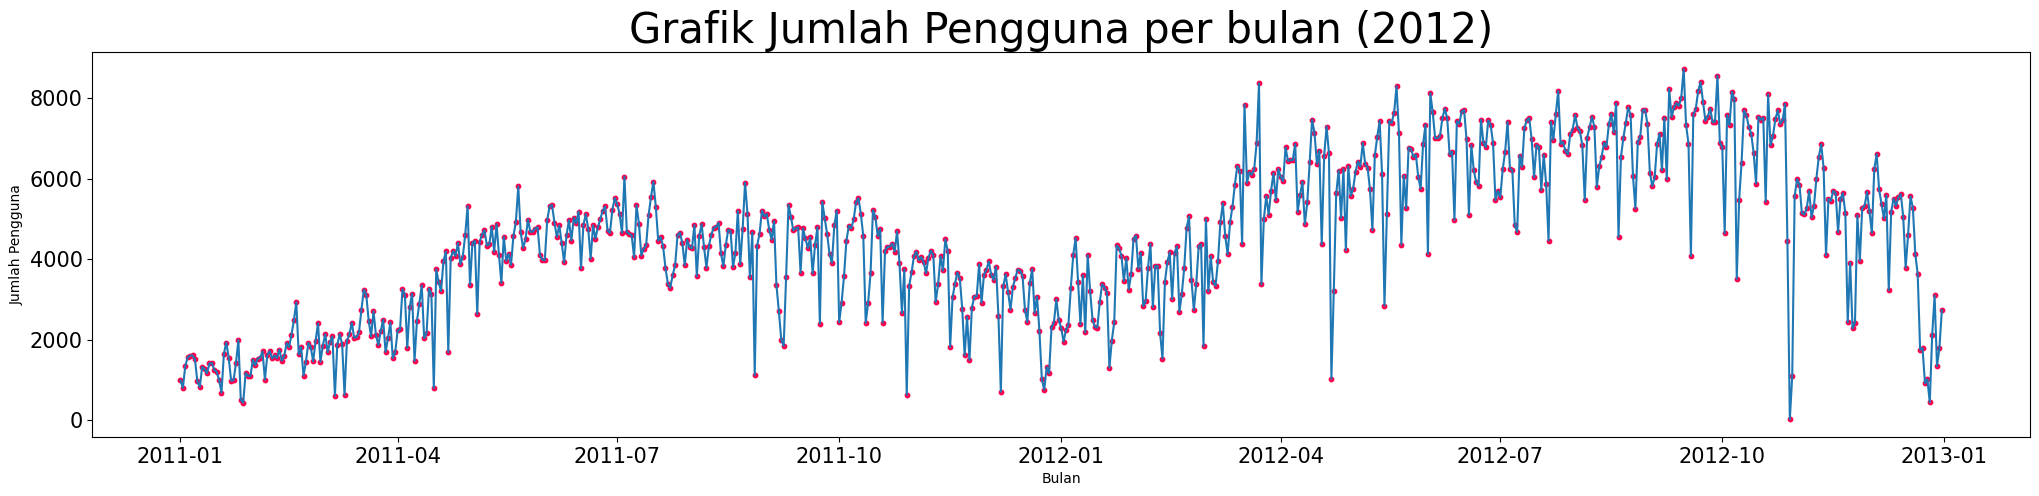

In [ ]:
monthly_counts = day_df['cnt'].groupby(day_df['dteday']).max()

plt.figure(figsize=(25, 5))
plt.scatter(monthly_counts.index, monthly_counts.values, c="#FF004D", s=10, marker='o')
plt.plot(monthly_counts.index, monthly_counts.values)
plt.title("Grafik Jumlah Pengguna per bulan (2012)", loc="center", fontsize=30)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Insight :** <br>
Berdasarkan grafik yang dihasilkan, terlihat bahwa jumlah pengguna cenderung meningkat pada bulan-bulan tertentu (misalnya, bulan Mei - Agustus) yang kemungkinan besar selama musim panas. Sebaliknya, grafik juga menunjukkan penuruan jumlah pengguna pada bulan-bulan teertentu, terutama di musim dingin (misalnya, bulan November - Maret).

### Pertanyaan 2 : Pada hari apa pengguna paling sering dan paling jarang menyewa sepeda ?

In [ ]:
# Menggelompokkan data berdasarkan one_of_week dan cnt
sum_order_items_df = day_df.groupby(by="one_of_week").cnt.sum().sort_values(ascending=False).reset_index()

<ipython-input-24-69b602d64124>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_order_items_df = day_df.groupby(by="one_of_week").cnt.sum().sort_values(ascending=False).reset_index()


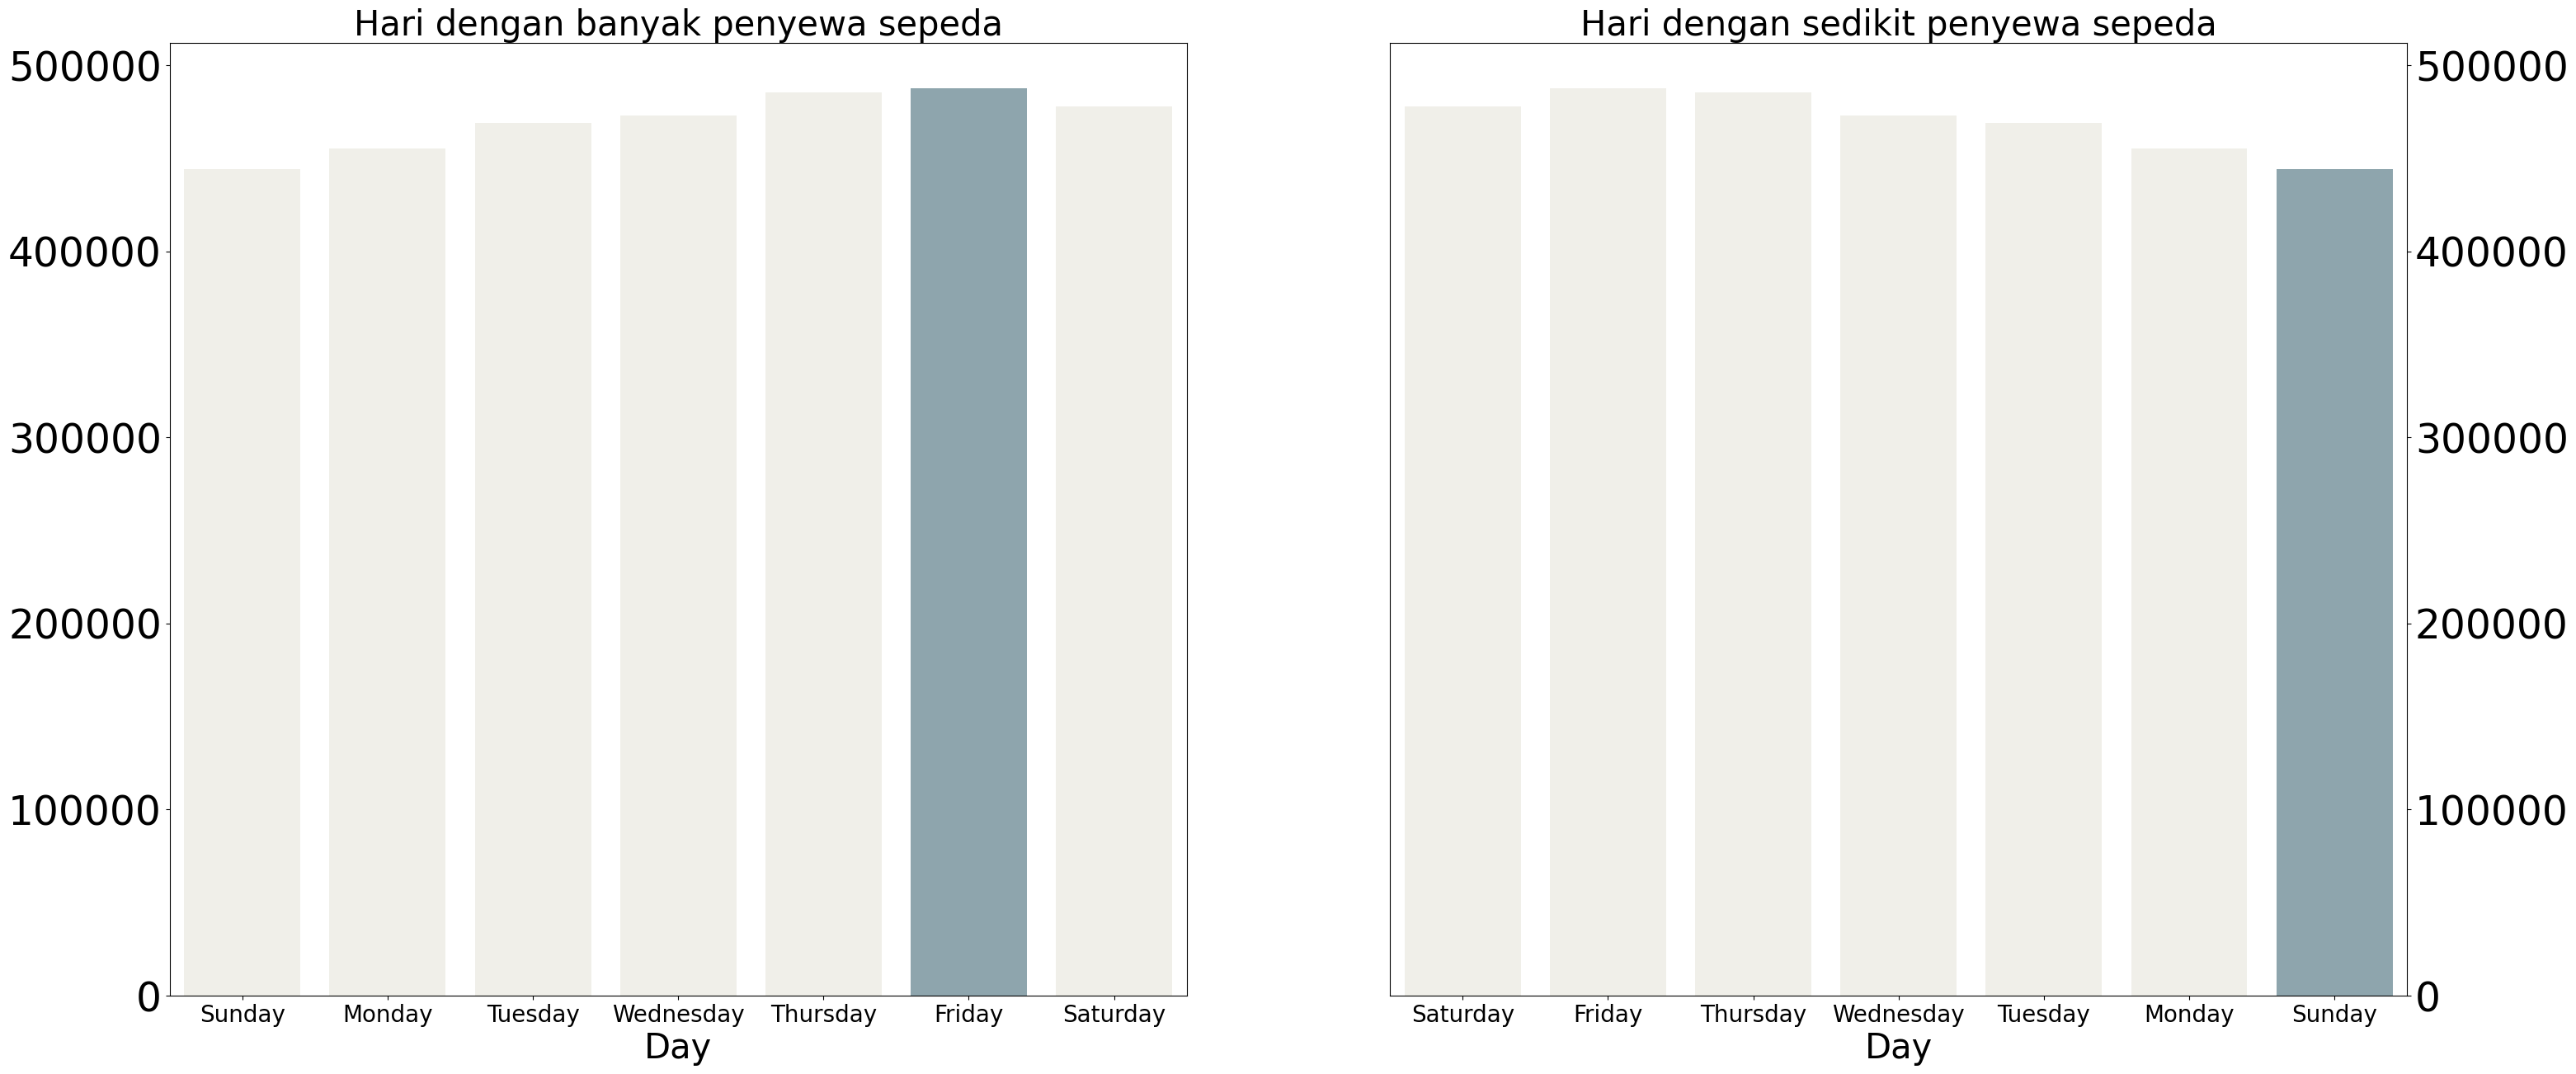

In [ ]:
# Membuat bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Membuat barplot untuk hari paling sering/banyak pengguna menyewa sepeda
sns.barplot(x="one_of_week", y="cnt", data=sum_order_items_df.head(7), hue="one_of_week", palette=["#F1F0E8", "#F1F0E8", "#F1F0E8", "#F1F0E8", "#F1F0E8", "#89A8B2", "#F1F0E8"], ax=ax[0], legend=False)

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Day", fontsize=30)
ax[0].set_title("Hari dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=20)

# Membuat barplot untuk hari paling jarang/sedikit pengguna menyewa sepeda
sns.barplot(x="one_of_week", y="cnt", data=sum_order_items_df.sort_values(by="one_of_week", ascending=True).head(7), hue="one_of_week", palette=["#89A8B2", "#F1F0E8", "#F1F0E8", "#F1F0E8", "#F1F0E8", "#F1F0E8", "#F1F0E8"], ax=ax[1], legend=False)

# mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Day", fontsize=30)
ax[1].set_title("Hari dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=20)

plt.show()

**Insight :** <br>
Berdasarkan visualisasi tersebut, dapat diketahui bahwa penyewaan sepeda paling banyak terjadi pada hari Jumat sekitar 487790 pengguna. Sebaliknya, penyewaan sepeda paling sedikit terjadi pada hari Minggu sekitar 444027 pengguna.

### Pertanyaan 3 : Seberapa besar pengaruh musim terhadap penyewaan sepeda?

In [ ]:
# Menggelompokkan data berdasarkan season dan cnt
sum_order_items_df = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()

<ipython-input-26-03411a336788>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_order_items_df = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()


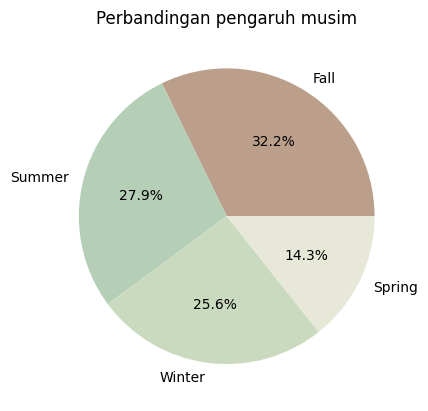

In [ ]:
# Membuat data untuk pie chart
data = sum_order_items_df['cnt']
labels = sum_order_items_df['season']

# Membuat pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#BC9F8B", "#B5CFB7", "#CADABF", "#E7E8D8"])
plt.title('Perbandingan pengaruh musim')

# Menampilkan pie chart
plt.show()

**Insight :** <br>
Berdasarkan proporsi yang terlihat, dapat disimpulkan bahwa **musim memilih pengaruh signifikan terhadap penyewaan sepeda**. Untuk musim yang lebih nyaman dan menyenangkan, seperti musim gugur dan musim panas, lebih menarik banyak penyewa dengan proporsi sebesar 32.2% untuk musim gugur dan 27.9% untuk musim panas. Sebaliknya, pada musim semi yang sebesar 14.3% mungkin mengurangi minat pengguna untuk bersepeda karena masih menyesuaikan diri dengan kebiasaan musim dingin.

## Conclusion

- Pertanyaan :
1. Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?
2. Pada hari apa pengguna paling sering dan paling jarang menyewa sepeda ?
3. Seberapa besar pengaruh musim terhadap penyewaan sepeda dalam setahun ?

- Conclusion :
1. Berdasarkan grafik yang dihasilkan, terlihat bahwa jumlah pengguna cenderung meningkat pada bulan-bulan tertentu (misalnya, bulan Mei - Agustus) yang kemungkinan besar selama musim panas. Sebaliknya, grafik juga menunjukkan penuruan jumlah pengguna pada bulan-bulan teertentu, terutama di musim dingin (misalnya, bulan November - Maret).
2. Berdasarkan visualisasi tersebut, dapat diketahui bahwa penyewaan sepeda paling banyak terjadi pada hari Jumat sekitar 487790 pengguna. Sebaliknya, penyewaan sepeda paling sedikit terjadi pada hari Minggu sekitar 444027 pengguna.
3. Berdasarkan proporsi yang terlihat, dapat disimpulkan bahwa **musim memilih pengaruh signifikan terhadap penyewaan sepeda**. Untuk musim yang lebih nyaman dan menyenangkan, seperti musim gugur dan musim panas, lebih menarik banyak penyewa dengan proporsi sebesar 32.2% untuk musim gugur dan 27.9% untuk musim panas. Sebaliknya, pada musim semi yang sebesar 14.3% mungkin mengurangi minat pengguna untuk bersepeda karena masih menyesuaikan diri dengan kebiasaan musim dingin.

## Analisis Lanjutan

**RFM Analysis**

In [ ]:
current_date = max(hour_df['dteday'])

# Menghitung RFM
rfm_df = hour_df.groupby('registered').agg(
    Recency=('dteday', lambda x: (current_date - x.max()).days),  # Recency
    Frequency=('dteday', 'count'),  # Frequency
    Monetary=('cnt', 'sum')  # Monetary
).reset_index()

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


<ipython-input-29-22206397cdda>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-29-22206397cdda>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-29-22206397cdda>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="mo

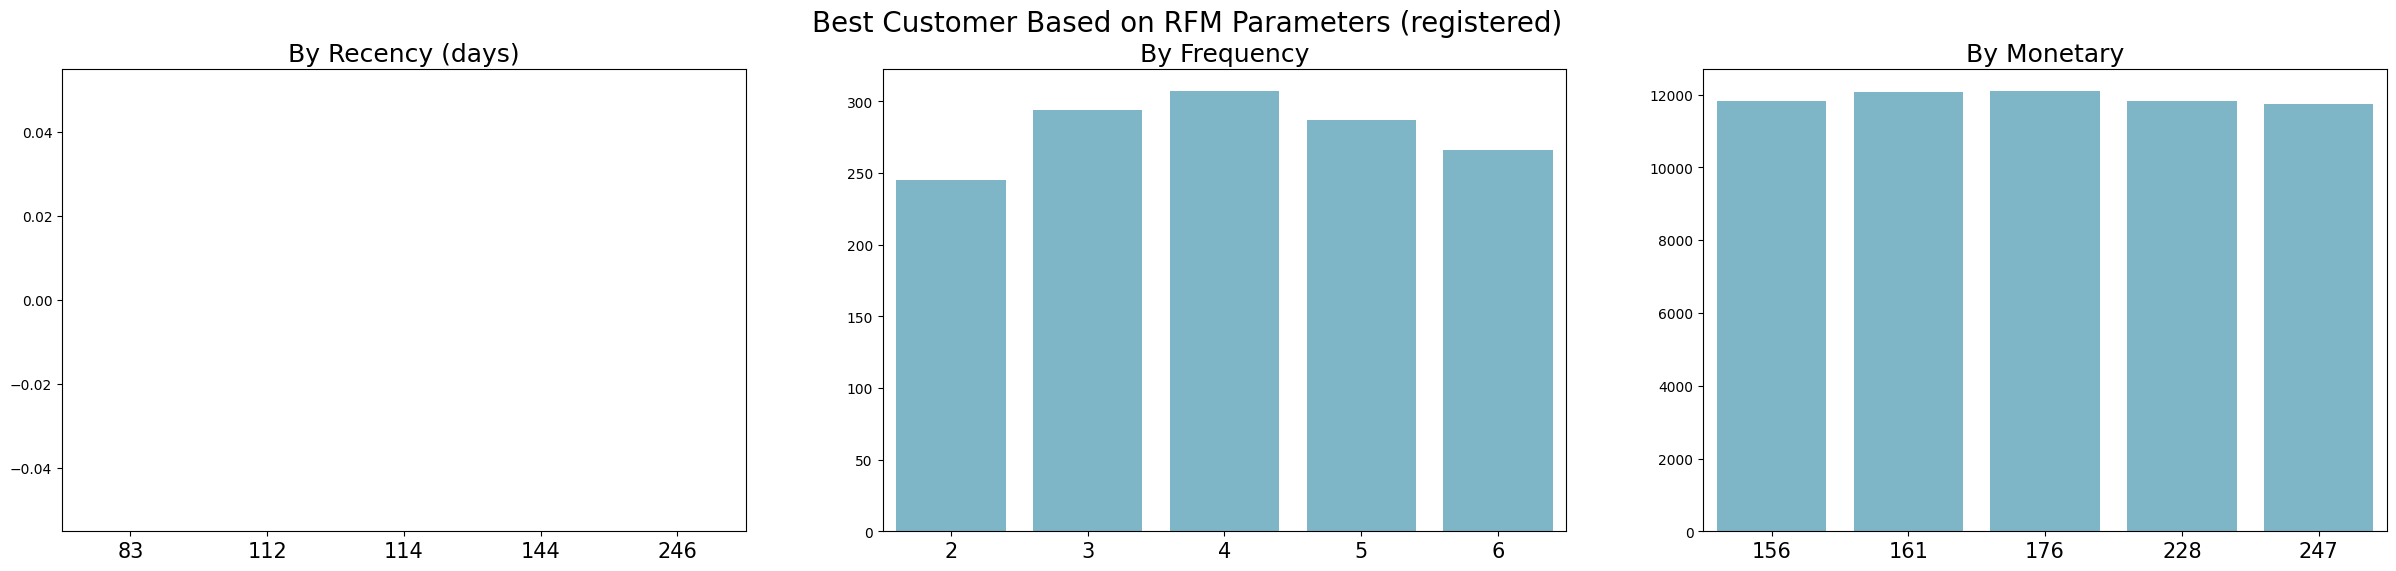

In [ ]:
rfm_df.columns = ['registered', 'recency', 'frequency', 'monetary']

# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna untuk grafik
colors = ["#72BCD4"] * 5  # Menggunakan warna yang sama untuk semua batang

# Grafik untuk Recency
sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Grafik untuk Frequency
sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Grafik untuk Monetary
sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Judul utama untuk semua grafik
plt.suptitle("Best Customer Based on RFM Parameters (registered)", fontsize=20)
plt.show()